<h1> Project: United Kingdom Road Accident Data Analysis</h1>
<h2> Inclusive Years: 2019-2022</h2>
<h2> Analyst: Eben Jalyn Apolinario</h2>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway

In [2]:
accident = pd.read_csv('dataset\\accident_data.csv')                        

In [3]:
accident = pd.read_csv('dataset\\accident_data.csv')                        

In [4]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [5]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h1> Data Cleansing </h1>

In [6]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [7]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('uncounted')
accident['Road_Type'] = accident['Road_Type'].fillna('uncounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('uncounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])


In [8]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1> Changing Data Types </h1>

In [9]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [10]:
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [11]:
accident.dtypes

Index                        object
Accident_Severity          category
Accident Date                object
Latitude                   category
Light_Conditions           category
District Area              category
Longitude                  category
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

<h1> Converting Object to Data Time Data Type </h1>

In [12]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [13]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [14]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1> Extracting date information using pandas date time </h1>

In [15]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek


In [16]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [17]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

<h1> >>>UNIVIRATE / BIVARIATE / MULTIVARIATE <<< </h1>

<h1> Insight 1 </h1>
<h2> Accident Severity per category</h2>
<h3> Based on the result it appears that there are more accidents that are Slight in severity(85.34%) followed by Serious(13.35%) and lastly Fatal( 1.31%). </h3>

In [18]:
accident_severity_counts = accident['Accident_Severity'] .value_counts()
print(accident_severity_counts)


Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64


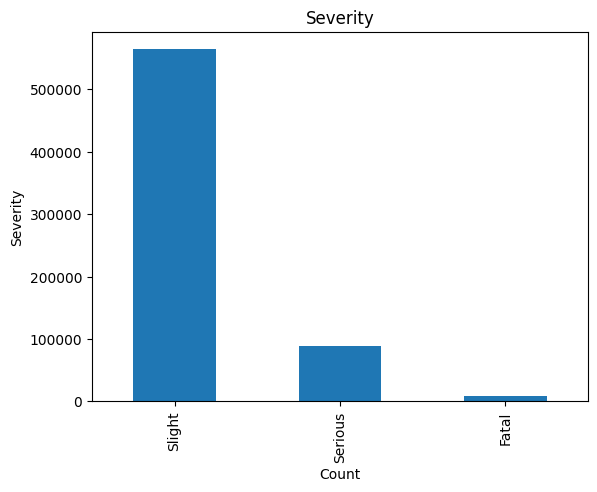

In [19]:
#new_df = accident[accident['Accident_Severity'] != 'Slight']

accident_severity_counts.plot(kind = 'bar')
plt.title('Severity')
plt.xlabel('Count')
plt.ylabel('Severity')
plt.show()

<h1> Insight 2 </h1>
<h2> Vehicle Type by Fatal Accident </h2>
<h3>Cars have the highest fatality rate, making up 75.94% of all fatal accidents involving vehicles. </h3>

In [20]:
fatal_accidents = accident[accident['Accident_Severity'] == 'Fatal']
print(fatal_accidents['Vehicle_Type'].value_counts())

Vehicle_Type
Car                                      6577
Van / Goods 3.5 tonnes mgw or under       467
Motorcycle over 500cc                     339
Bus or coach (17 or more pass seats)      325
Goods 7.5 tonnes mgw and over             216
Motorcycle 125cc and under                189
Taxi/Private hire car                     155
Motorcycle over 125cc and up to 500cc     105
Motorcycle 50cc and under                  95
Other vehicle                              70
Goods over 3.5t. and under 7.5t            67
Minibus (8 - 16 passenger seats)           29
Agricultural vehicle                       21
Pedal cycle                                 6
Data missing or out of range                0
Ridden horse                                0
Name: count, dtype: int64


In [21]:
fatal_accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
7,200701BS67370,Fatal,2019-10-03,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,3,3
11,200701BS67747,Fatal,2019-11-02,51.499127,Daylight,Kensington and Chelsea,-0.159652,1,2,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,11,2,5
20,200701BS68301,Fatal,2019-10-24,51.505996,Daylight,Kensington and Chelsea,-0.214277,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,24,3
21,200701BS68302,Fatal,2019-11-24,51.486795,Daylight,Kensington and Chelsea,-0.170375,5,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,11,24,6
717,200701CP00032,Fatal,2019-01-30,51.510978,Daylight,City of London,-0.107581,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car,2019,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660470,201091NH00529,Fatal,2022-01-29,58.475726,Daylight,Western Isles,-6.278583,1,1,Wet or damp,Single carriageway,Rural,Fine + high winds,Car,2022,1,29,5
660519,201091NJ01533,Fatal,2022-02-02,58.495554,Daylight,Highland,-4.451628,1,1,Snow,Single carriageway,Rural,Snowing no high winds,Car,2022,2,2,2
660565,201091NJ11329,Fatal,2022-08-15,57.871514,Daylight,Highland,-4.243081,1,1,Dry,Single carriageway,Rural,Fine no high winds,Goods 7.5 tonnes mgw and over,2022,8,15,0
660581,201091NJ14695,Fatal,2022-10-21,58.445475,Darkness - lights lit,Highland,-3.065535,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2022,10,21,4


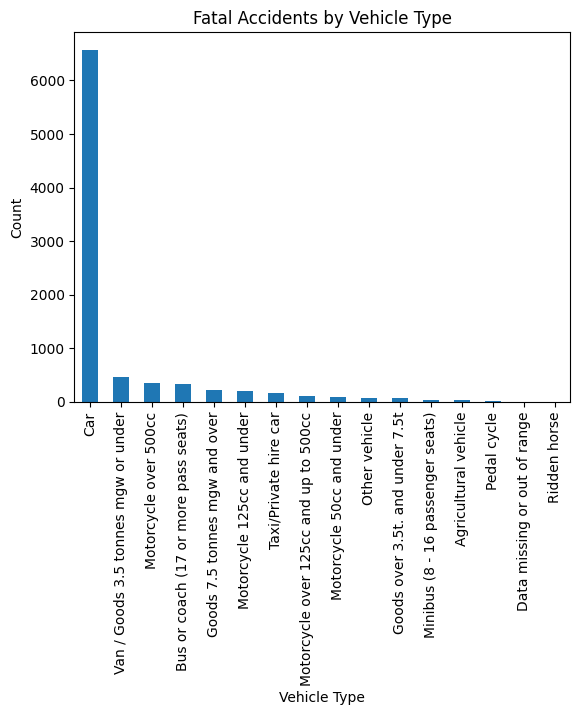

In [22]:

vehicle_type_counts = fatal_accidents['Vehicle_Type'].value_counts()


vehicle_type_counts.plot(kind='bar')


plt.title('Fatal Accidents by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')


plt.show()

<h1> Insight 3 </h1>
<h2> Average Casualties by Accident Severity </h2>
<h3> Since "Fatal" accidents have the highest number of incidents, they also result in the highest average casualty rate. This shows that fatal accidents not only occur frequently but also cause the most severe harm on average. </h3>

In [23]:
print(accident.groupby('Accident_Severity')['Number_of_Casualties'].mean())

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64


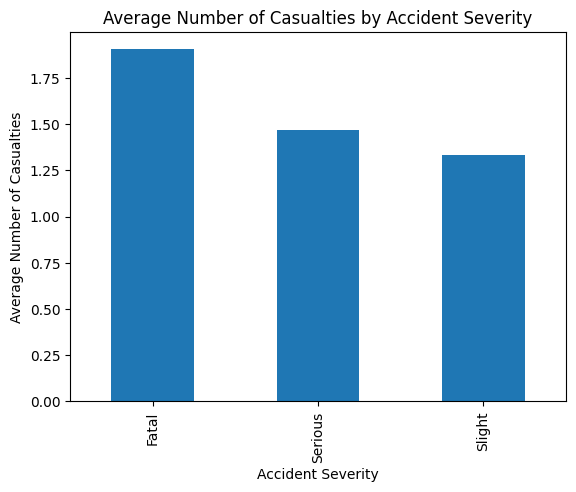

In [24]:

severity_casualties_mean = accident.groupby('Accident_Severity')['Number_of_Casualties'].mean()


severity_casualties_mean.plot(kind='bar')


plt.title('Average Number of Casualties by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Average Number of Casualties')


plt.show()

<h1> Insight 4</h1>
<h2> Total Casualties by Weather Conditions </h2>
<h3> The results show that weather conditions described as "Fine, no high winds" account for the highest number of casualties, making up about 78.46% of the total. This highlights that most accidents occur even in safe weather conditions </h3>

<h1> Insight 5 </h1>
<h2> Most Common Weather Condition </h2>
<h3> It appears that "Fine, no high winds" is the most common weather condition during accidents, showing that even in good weather, accidents still occur.</h3>

In [25]:
print(accident.groupby('Weather_Conditions')['Number_of_Casualties'].sum())

Weather_Conditions
Fine + high winds         11856
Fine no high winds       703445
Fog or mist                5126
Other                     23236
Raining + high winds      13621
Raining no high winds    112229
Snowing + high winds       1255
Snowing no high winds      8370
uncounted                 17430
Name: Number_of_Casualties, dtype: int64


In [26]:
Most_Common_Weather = accident['Weather_Conditions'].mode()[0]
print(f"Most Common Weather")
print(Most_Common_Weather)

Most Common Weather
Fine no high winds


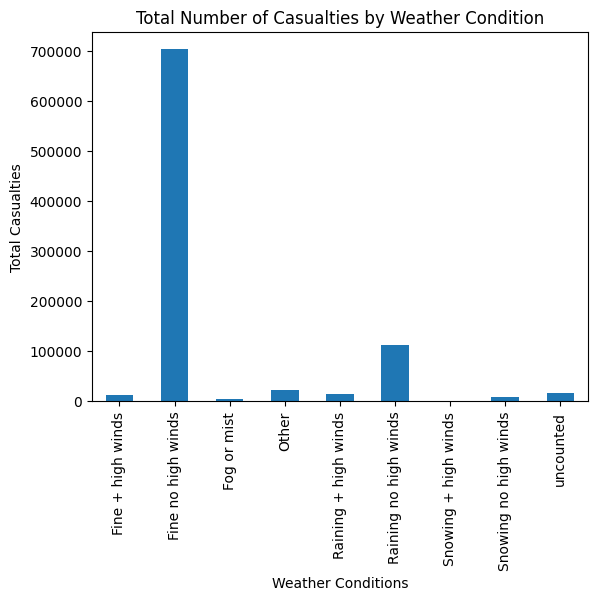

In [27]:

weather_casualties = accident.groupby('Weather_Conditions')['Number_of_Casualties'].sum()

weather_casualties.plot(kind='bar')
plt.title('Total Number of Casualties by Weather Condition')
plt.xlabel('Weather Conditions')
plt.ylabel('Total Casualties')
plt.show()


<h1> Insight 6</h1>
<h2> Fatal Accidents by Weather </h2>
<h3> A closer look at the data reveals that the weather condition with the highest number of fatalities is "Fine, no high winds." This indicates that even in safe and favorable weather, fatal accidents are most likely to occur.</h3>

In [28]:
fatal_accidents = accident[accident['Accident_Severity'] == 'Fatal']
print(fatal_accidents['Weather_Conditions'].value_counts())

Weather_Conditions
Fine no high winds       7100
Raining no high winds     848
Fine + high winds         175
Other                     165
Raining + high winds      145
uncounted                 107
Fog or mist                82
Snowing no high winds      36
Snowing + high winds        3
Name: count, dtype: int64


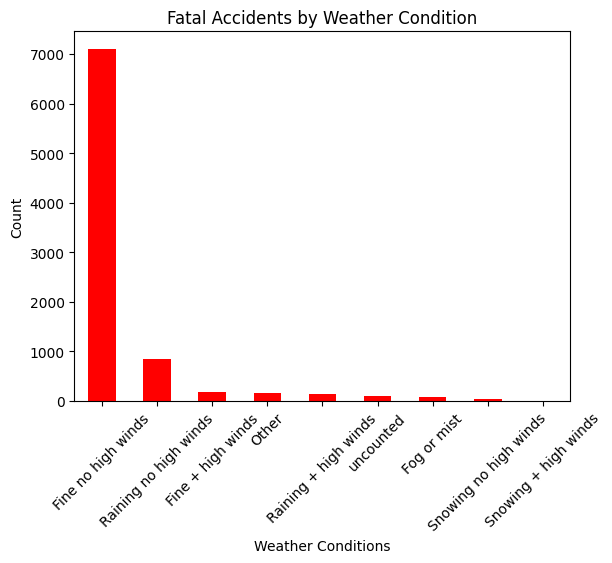

In [29]:

fatal_accidents = accident[accident['Accident_Severity'] == 'Fatal']
weather_counts = fatal_accidents['Weather_Conditions'].value_counts()

weather_counts.plot(kind='bar', color='red')
plt.title('Fatal Accidents by Weather Condition')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()


<h1> Insight 7 </h1>
<h2> Fine no high winds in Urban and Rural Areas </h2>
<h3> The data shows that the weather condition "Fine, no high winds" is most frequently associated with accidents in urban areas. This suggests that even in good weather, urban environments experience more accidents. </h3>

In [30]:
weather = accident[accident['Weather_Conditions'] == 'Fine no high winds']
print(weather['Urban_or_Rural_Area'].value_counts())

Urban_or_Rural_Area
Urban          339088
Rural          181792
Unallocated         5
Name: count, dtype: int64


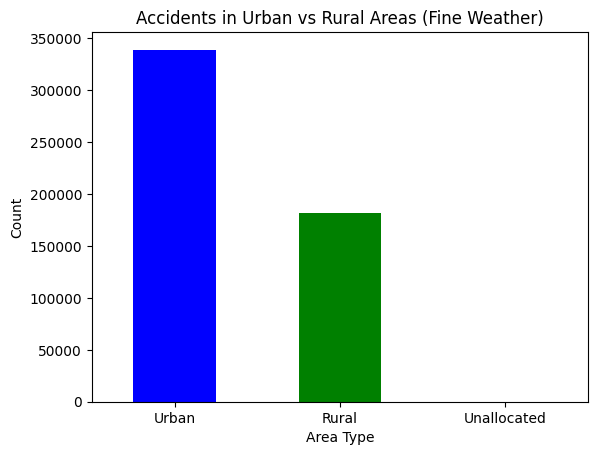

In [31]:

weather = accident[accident['Weather_Conditions'] == 'Fine no high winds']
area_counts = weather['Urban_or_Rural_Area'].value_counts()


area_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Accidents in Urban vs Rural Areas (Fine Weather)')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.xticks(rotation=0) 

plt.show()


<h1> Insight 8 </h1>
<h2> Accidents by Urban vs. Rural Area </h2>
<h3> Since the data above shows that the weather 'Fine no high winds' got the highest casualty then weather 'Fine no high winds' moslty appears in the Urban area. This data shows that Urban area got the highest number of accidents which supported the claims above</h3>

In [32]:
Urban_Rural = accident['Urban_or_Rural_Area'].value_counts()
print(f'Accident Per Area')
print(Urban_Rural)


Accident Per Area
Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64


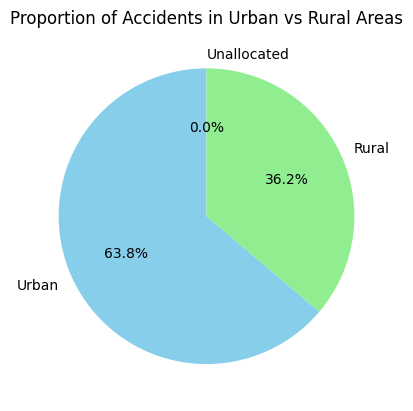

In [33]:

urban_rural_counts = accident['Urban_or_Rural_Area'].value_counts()
urban_rural_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])

plt.title('Proportion of Accidents in Urban vs Rural Areas')


plt.ylabel('')

plt.show()

<h1> Insight 9 </h1>
<h2> Fatal Accidents in Urban and Rural Area </h2>
<h3> This data shows that even though Urban got the highest number of accidents Rural area got the highest fatality count which means there are more deaths in Rural Areas </h3>

In [34]:
fatal_accidents = accident[accident['Accident_Severity'] == 'Fatal']
print(fatal_accidents['Urban_or_Rural_Area'].value_counts())

Urban_or_Rural_Area
Rural          5601
Urban          3060
Unallocated       0
Name: count, dtype: int64


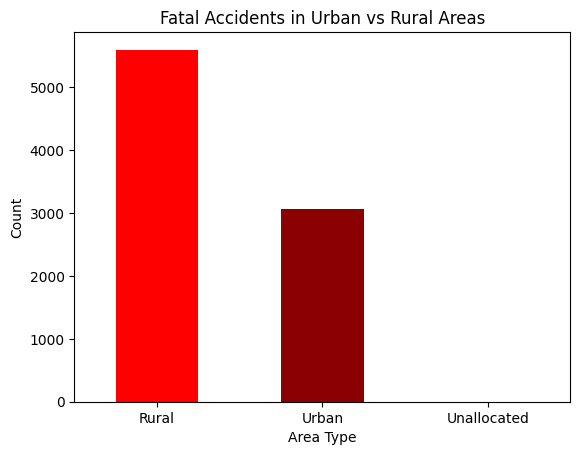

In [35]:

fatal_accidents = accident[accident['Accident_Severity'] == 'Fatal']
area_counts = fatal_accidents['Urban_or_Rural_Area'].value_counts()


area_counts.plot(kind='bar', color=['red', 'darkred'])
plt.title('Fatal Accidents in Urban vs Rural Areas')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.show()


<h1> Insight 10 </h1>
<h2> Casualties by Vehicle Type </h2>
<h3> The data shows that cars account for the majority of casualties, making up approximately 86.5% of all vehicle-related accidents. This is followed by motorcycles over 500cc at about 4.4% , and buses or coaches at roughly 4.4%.</h3>

In [36]:
print(accident.groupby('Vehicle_Type')['Number_of_Casualties'].sum())

Vehicle_Type
Agricultural vehicle                       2613
Bus or coach (17 or more pass seats)      34915
Car                                      676692
Data missing or out of range                  9
Goods 7.5 tonnes mgw and over             23397
Goods over 3.5t. and under 7.5t            8308
Minibus (8 - 16 passenger seats)           2659
Motorcycle 125cc and under                20348
Motorcycle 50cc and under                 10167
Motorcycle over 125cc and up to 500cc     10286
Motorcycle over 500cc                     34879
Other vehicle                              7554
Pedal cycle                                 270
Ridden horse                                  5
Taxi/Private hire car                     18195
Van / Goods 3.5 tonnes mgw or under       46271
Name: Number_of_Casualties, dtype: int64


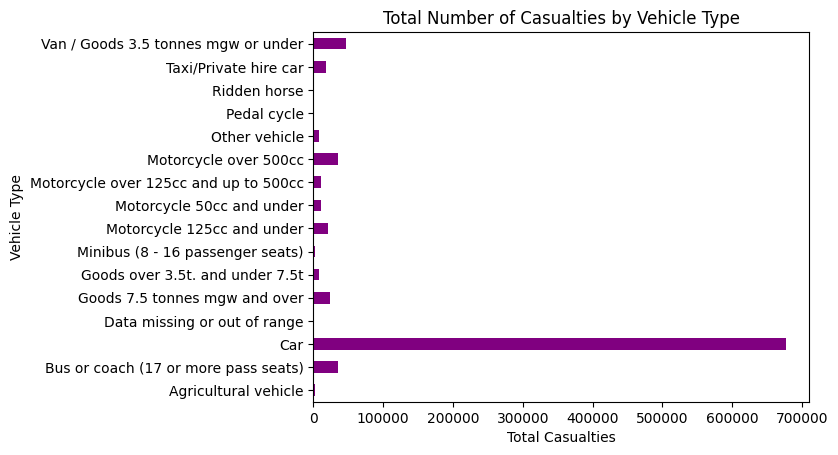

In [37]:

vehicle_casualties = accident.groupby('Vehicle_Type')['Number_of_Casualties'].sum()


vehicle_casualties.plot(kind='barh', color='purple')
plt.title('Total Number of Casualties by Vehicle Type')
plt.xlabel('Total Casualties')
plt.ylabel('Vehicle Type')

plt.show()



<h1> Insight 11 </h1>
<h2> Vehicle Type in Urban and Rural Area </h2>
<h3> The data consistently highlights that cars are the vehicle type most frequently involved in accidents in both rural and urban areas, aligning with their highest number of casualties. This reinforces the fact that cars dominate accident statistics.</h3>

In [38]:
print(accident.groupby('Urban_or_Rural_Area')['Vehicle_Type'].value_counts())

Urban_or_Rural_Area  Vehicle_Type                         
Rural                Car                                      181922
                     Van / Goods 3.5 tonnes mgw or under       12156
                     Bus or coach (17 or more pass seats)       9025
                     Motorcycle over 500cc                      8957
                     Goods 7.5 tonnes mgw and over              6156
                     Motorcycle 125cc and under                 5023
                     Taxi/Private hire car                      4677
                     Motorcycle 50cc and under                  2710
                     Motorcycle over 125cc and up to 500cc      2674
                     Goods over 3.5t. and under 7.5t            2232
                     Other vehicle                              1994
                     Minibus (8 - 16 passenger seats)            718
                     Agricultural vehicle                        675
                     Pedal cycle            

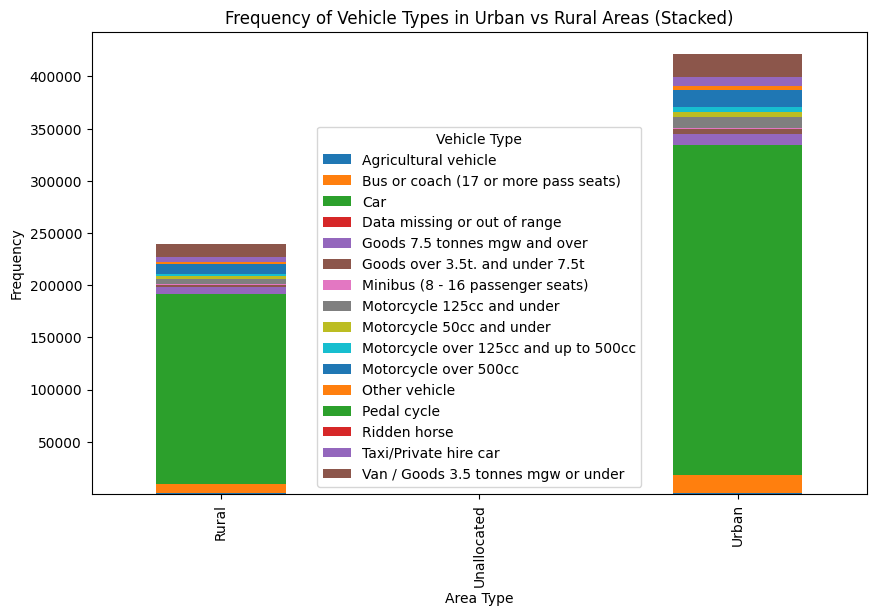

In [39]:

vehicle_area_counts = accident.groupby(['Urban_or_Rural_Area', 'Vehicle_Type']).size().unstack()


vehicle_area_counts.plot(kind='bar', stacked=True, figsize=(10, 6))


plt.title('Frequency of Vehicle Types in Urban vs Rural Areas (Stacked)')
plt.xlabel('Area Type')
plt.ylabel('Frequency')
plt.legend(title='Vehicle Type')

plt.show()

<h1> Insight 12 </h1>
<h2> Average Vehicles Involved by Road Type </h2>
<h3> Among the road types, dual carriageways recorded the highest number of vehicles involved in accidents. This highlights the need for enhanced safety measures and better traffic management. </h3>

In [40]:
print(accident.groupby('Road_Type')['Number_of_Vehicles'].mean())

Road_Type
Dual carriageway      2.009766
One way street        1.585441
Roundabout            1.901323
Single carriageway    1.795911
Slip road             1.917483
uncounted             1.674115
Name: Number_of_Vehicles, dtype: float64


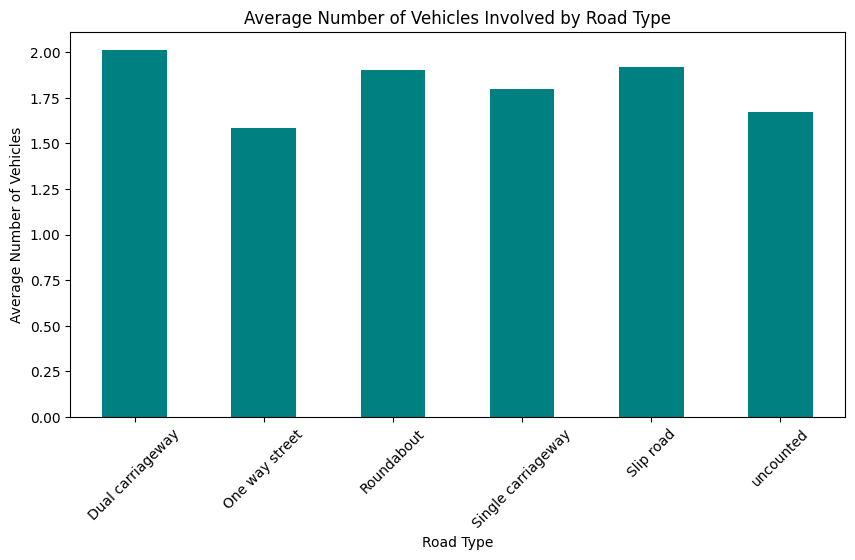

In [41]:

road_vehicle_mean = accident.groupby('Road_Type')['Number_of_Vehicles'].mean()

road_vehicle_mean.plot(kind='bar', color='teal', figsize=(10, 5))
plt.title('Average Number of Vehicles Involved by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Average Number of Vehicles')
plt.xticks(rotation=45) 
plt.show()


<h1> Insight 13 </h1>
<h2> Total Casualities by Road Surface Condition </h2>
<h3>The results reveal that the road surface condition with the highest number of casualties is "Dry." This unexpected finding suggests that factors other than slippery or adverse road conditions, such as driver behavior or traffic volume, may play a significant role in accidents on dry roads. </h3>

In [42]:
print(accident.groupby(['Road_Surface_Conditions'])['Number_of_Casualties'].sum())

Road_Surface_Conditions
Dry                     597723
Flood over 3cm. deep      1521
Frost or ice             24976
Snow                      8008
Wet or damp             263457
uncounted                  883
Name: Number_of_Casualties, dtype: int64


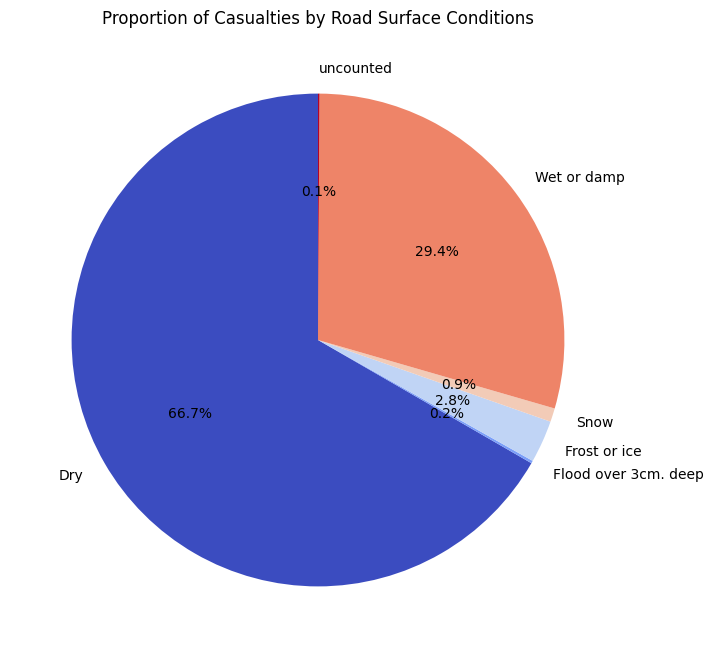

In [43]:
road_surface_casualties = accident.groupby('Road_Surface_Conditions')['Number_of_Casualties'].sum()

road_surface_casualties.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))
plt.title('Proportion of Casualties by Road Surface Conditions')
plt.ylabel('')  # Hides the y-label
plt.show()


<h1> Insight 14 </h1>
<h2> Casualties by Light Conditions </h2>
<h3> The light condition with the highest number of casualties is "Darkness - Lights Lit," indicating that even when lights are on, accidents during dark conditions remain a significant concern.</h3>

In [44]:
print(accident.groupby(['Light_Conditions'])['Number_of_Casualties'].sum())

Light_Conditions
Darkness - lighting unknown      8471
Darkness - lights lit          177108
Darkness - lights unlit          3385
Darkness - no lighting          57715
Daylight                       649889
Name: Number_of_Casualties, dtype: int64


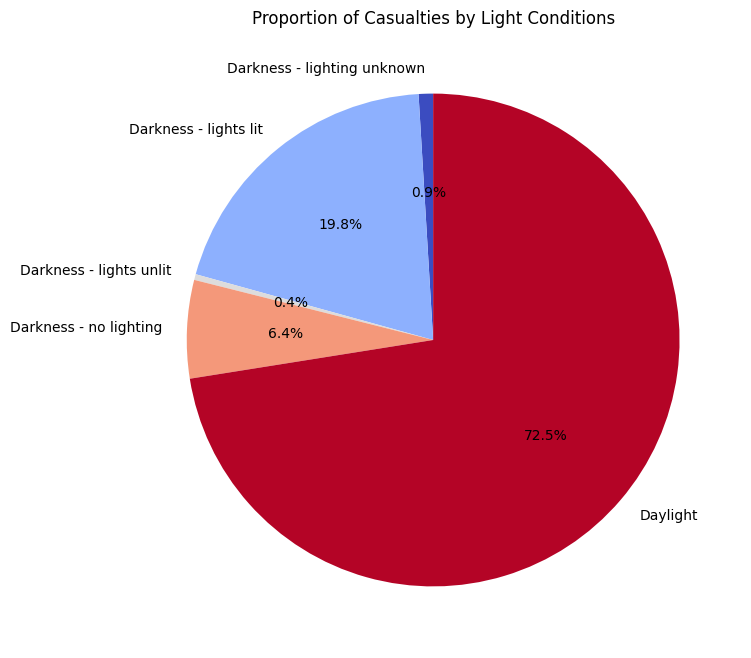

In [45]:
light_casualties = accident.groupby('Light_Conditions')['Number_of_Casualties'].sum()

light_casualties.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))
plt.title('Proportion of Casualties by Light Conditions')
plt.ylabel('')
plt.show()


<h1> Insight 15 </h1>
<h2> Accidents by Year </h2>
<h3>Among all the years analyzed, 2019 recorded the highest number of accidents. This highlights a critical need to examine the factors contributing to this spike and implement targeted safety strategies moving forward. </h3>

In [46]:
accident['Year'] = accident['Accident Date'].dt.year
print(accident.groupby('Year').size())

Year
2019    182115
2020    170591
2021    163554
2022    144419
dtype: int64


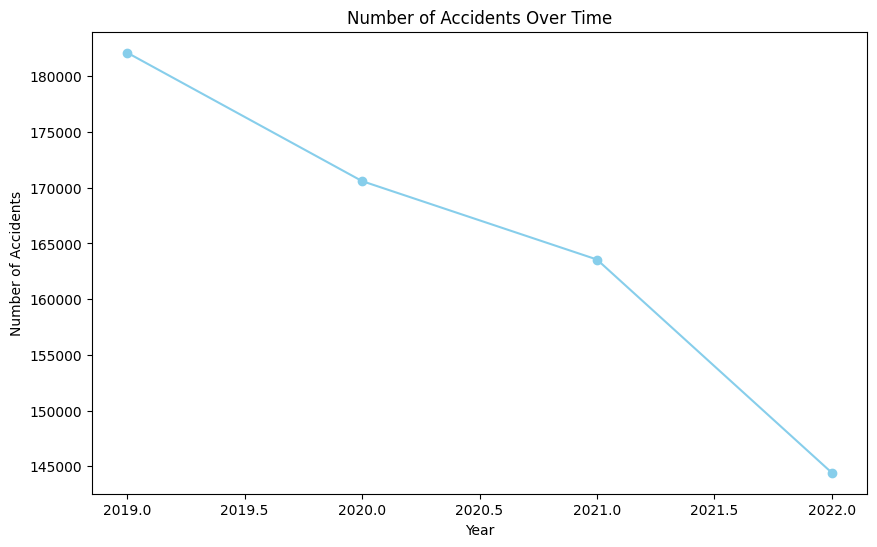

In [47]:

accidents_by_year = accident.groupby('Year').size()


accidents_by_year.plot(kind='line', marker='o', color='skyblue', figsize=(10, 6))


plt.title('Number of Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')


plt.show()

<h1> Insight 16</h1>
<h2> Accidents by Month </h2>
<h3> The results indicate that November has the highest accident count compared to all other months. This highlights a potential need for increased safety measures and awareness during this time of the year.</h3>

In [48]:
accident['Month'] = accident['Accident Date'].dt.month
print(accident['Month'].value_counts().sort_index())

Month
1     52872
2     49491
3     54086
4     51744
5     56352
6     56481
7     57445
8     53913
9     56455
10    59580
11    60424
12    51836
Name: count, dtype: int64


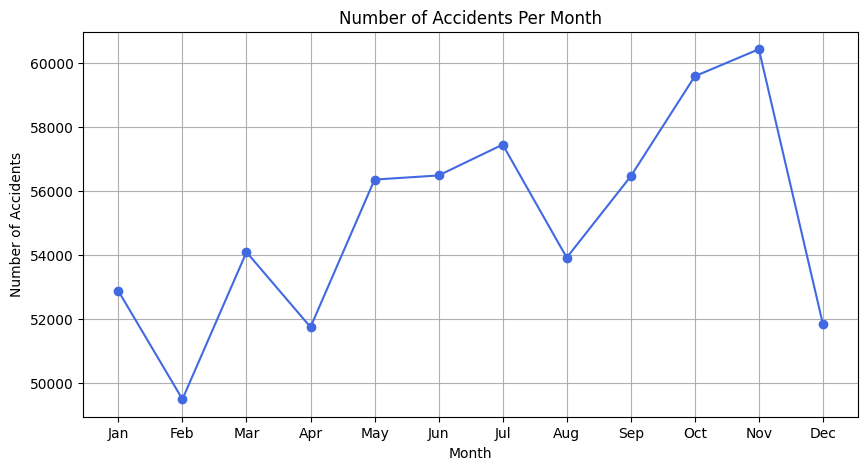

In [49]:

accidents_per_month = accident['Month'].value_counts().sort_index()


plt.figure(figsize=(10, 5))
plt.plot(accidents_per_month.index, accidents_per_month.values, marker='o', linestyle='-', color='royalblue')
plt.title('Number of Accidents Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]) 
plt.grid(True)
plt.show()


<h1> Insight 17 </h1>
<h2> DataFrame for Monthly Trends in Urban vs. Rural Accidents </h2>
<h3>The results reveal that July has the highest accident rate in rural areas, while in urban areas, November records the most accidents. This suggests that accident patterns vary by location and time of year, possibly due to seasonal factors or differences in activity levels. </h3>

In [50]:
accident['Month'] = accident['Accident Date'].dt.month
df_monthly_trends = accident.groupby(['Month', 'Urban_or_Rural_Area']).size().unstack(fill_value=0)
print(df_monthly_trends)

Urban_or_Rural_Area  Rural  Unallocated  Urban
Month                                         
1                    19540            1  33331
2                    18140            0  31351
3                    18806            1  35279
4                    18432            1  33311
5                    20125            2  36225
6                    20200            2  36279
7                    21215            1  36229
8                    20998            0  32915
9                    20035            0  36420
10                   20786            0  38794
11                   21352            0  39072
12                   19361            3  32472


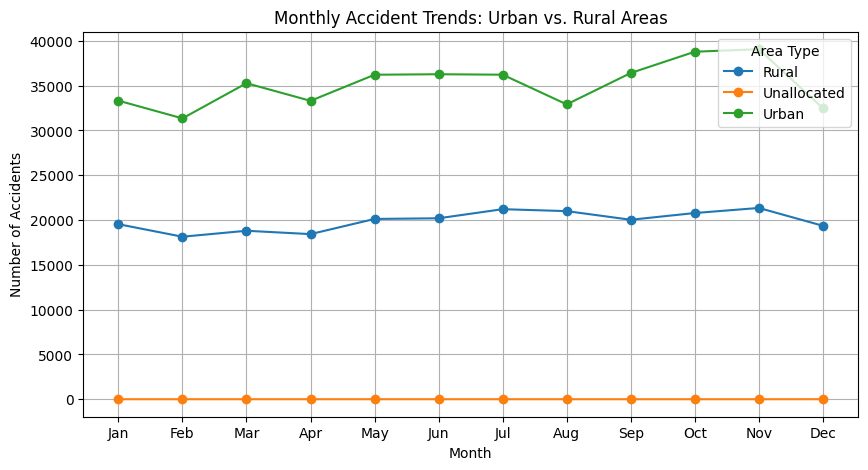

In [51]:

df_monthly_trends = accident.groupby(['Month', 'Urban_or_Rural_Area']).size().unstack(fill_value=0)


plt.figure(figsize=(10, 5))
for area in df_monthly_trends.columns:
    plt.plot(df_monthly_trends.index, df_monthly_trends[area], marker='o', linestyle='-', label=area)

plt.title('Monthly Accident Trends: Urban vs. Rural Areas')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])  
plt.legend(title='Area Type')
plt.grid(True)
plt.show()


<h1> Insight 18 </h1>
<h2> Cacualty Rate by Urban/Rural Area and Road Type </h2>
<h3> In rural areas, single carriageways had the highest casualty rate at 0.91, while in urban areas, one-way streets were the most dangerous with a rate of 0.84. These numbers show that different road types need specific safety improvements to reduce accidents.</h3>

In [52]:
accident['Casuality_Rate'] = accident['Number_of_Casualties'] / accident['Number_of_Vehicles']
print(accident.groupby(['Urban_or_Rural_Area', 'Road_Type'])['Casuality_Rate'].mean())

Urban_or_Rural_Area  Road_Type         
Rural                Dual carriageway      0.858434
                     One way street        0.890640
                     Roundabout            0.741760
                     Single carriageway    0.912636
                     Slip road             0.861361
                     uncounted             0.883397
Unallocated          Dual carriageway      1.000000
                     One way street             NaN
                     Roundabout            0.500000
                     Single carriageway    0.648148
                     Slip road                  NaN
                     uncounted                  NaN
Urban                Dual carriageway      0.791252
                     One way street        0.840583
                     Roundabout            0.701307
                     Single carriageway    0.784288
                     Slip road             0.788661
                     uncounted             0.812169
Name: Casuality_Rate, dt

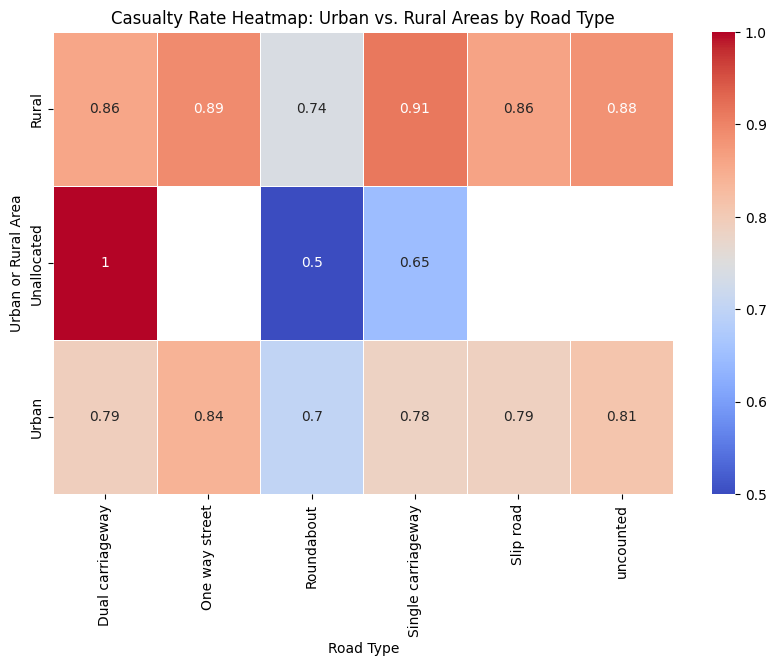

In [53]:

casualty_rate_heatmap = accident.groupby(['Urban_or_Rural_Area', 'Road_Type'])['Casuality_Rate'].mean().unstack()


plt.figure(figsize=(10, 6))
sns.heatmap(casualty_rate_heatmap, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Casualty Rate Heatmap: Urban vs. Rural Areas by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Urban or Rural Area')
plt.show()


<h1> Insight 19</h1>
<h2> Weekly Trends </h2>
<h3> The data reveals that Saturday has the highest number of accidents overall, with 1326 fatal, 14000 serious, and 91852 slight accidents, making it the most accident-prone day. However, Sunday records the highest number of fatal accidents (1522), indicating it as the deadliest day despite having fewer total accidents compared to Saturday.</h3>

In [54]:
accident['Day_of_Week'] = accident['Accident Date'].dt.day_name()
df_day_severity = pd.crosstab(accident['Day_of_Week'], accident['Accident_Severity'])
print(df_day_severity)

Accident_Severity  Fatal  Serious  Slight
Day_of_Week                              
Friday              1113    12633   84154
Monday              1385    11664   59631
Saturday            1326    14000   91852
Sunday              1522    13074   74706
Thursday            1097    12440   85974
Tuesday             1105    11918   81527
Wednesday           1113    12488   85957


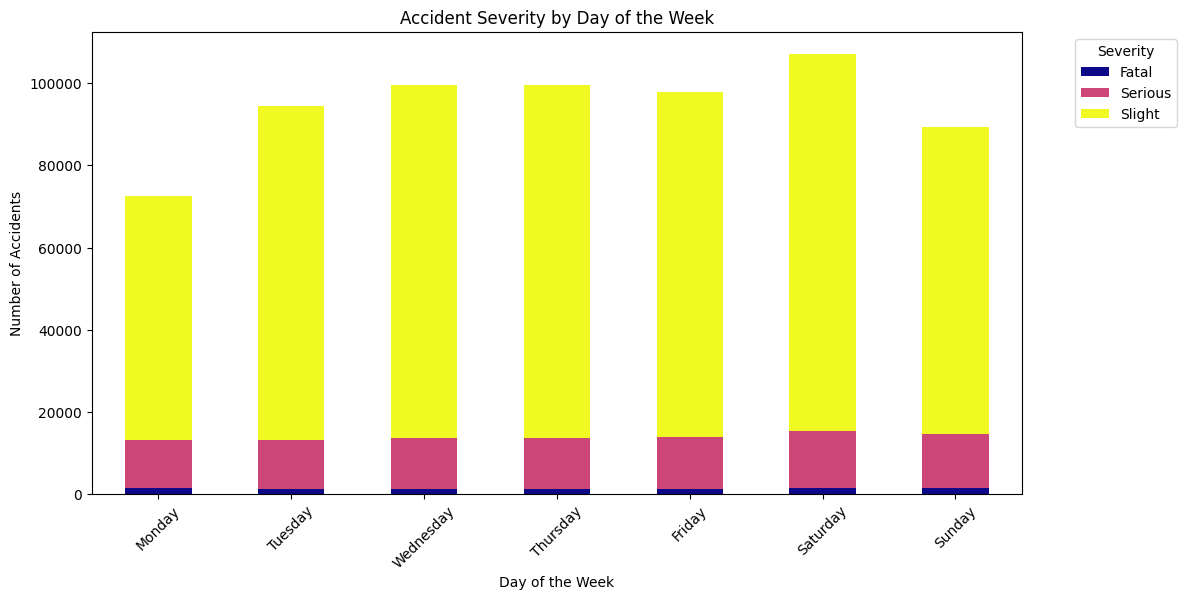

In [55]:

df_day_severity = pd.crosstab(accident['Day_of_Week'], accident['Accident_Severity'])


days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_day_severity = df_day_severity.reindex(days_order)


df_day_severity.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='plasma')
plt.title('Accident Severity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<h1> Insight 20</h1>
<h2> Seasonal Trend </h2>
<h3> The data shows a consistent increase in both the number of accidents and casualties across all seasons, with Season 4 (Winter) recording the highest totals of 176,459 accidents and 237,808 casualties. This upward trend highlights the need for targeted safety measures during this particularly risky time of the year. </h3>

In [56]:
accident['Season'] = accident['Accident Date'].dt.month % 12 // 3 + 1  
df_seasonal_trends = accident.groupby('Season').agg(
    Total_Accidents=('Accident_Severity', 'size'),
    Total_Casualties=('Number_of_Casualties', 'sum')
).reset_index()
print(df_seasonal_trends)

   Season  Total_Accidents  Total_Casualties
0       1           154199            208202
1       2           162182            220492
2       3           167839            230066
3       4           176459            237808


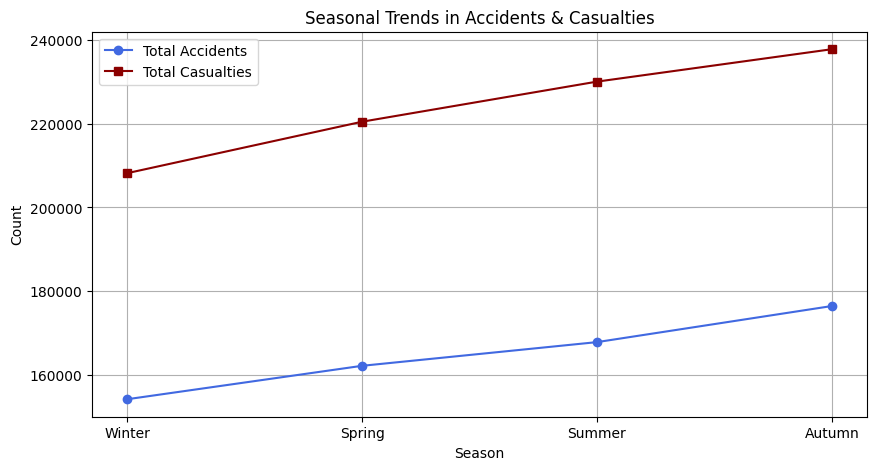

In [57]:
plt.figure(figsize=(10, 5))


plt.plot(df_seasonal_trends['Season'], df_seasonal_trends['Total_Accidents'], marker='o', linestyle='-', label='Total Accidents', color='royalblue')


plt.plot(df_seasonal_trends['Season'], df_seasonal_trends['Total_Casualties'], marker='s', linestyle='-', label='Total Casualties', color='darkred')

plt.title('Seasonal Trends in Accidents & Casualties')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.legend()
plt.grid(True)
plt.show()


<H1> Area Analysis </H1>

In [58]:
area_year = accident.groupby(['District Area', "Year"]).size().reset_index(name = "Accident_Count")

pivot_table = area_year.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count')


pivot_table

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019,365,552,171,305,107,397,282,268,367,401,...,356,710,215,291,333,366,502,328,230,503
2020,513,691,164,299,105,321,282,288,356,338,...,349,609,210,244,340,389,449,295,230,459
2021,445,687,155,298,20,335,232,280,338,340,...,303,633,239,255,318,323,397,321,273,484
2022,0,0,129,226,0,294,0,0,315,316,...,302,514,194,218,311,283,381,294,236,451


<H1> Creating a Line Plot </H1>

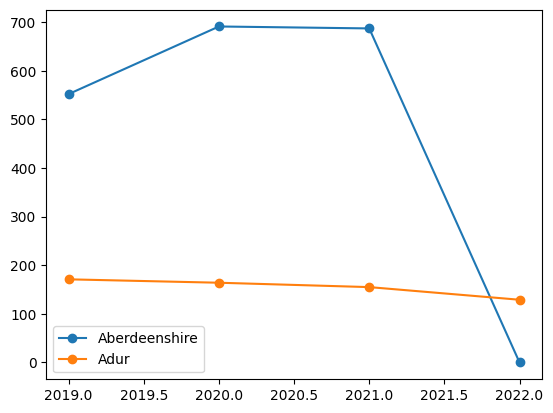

In [59]:
plt.plot(pivot_table.index, pivot_table['Aberdeenshire'], label = 'Aberdeenshire', marker='o')
plt.plot(pivot_table.index, pivot_table['Adur'], label = 'Adur', marker = 'o')
plt.legend()
plt.show()

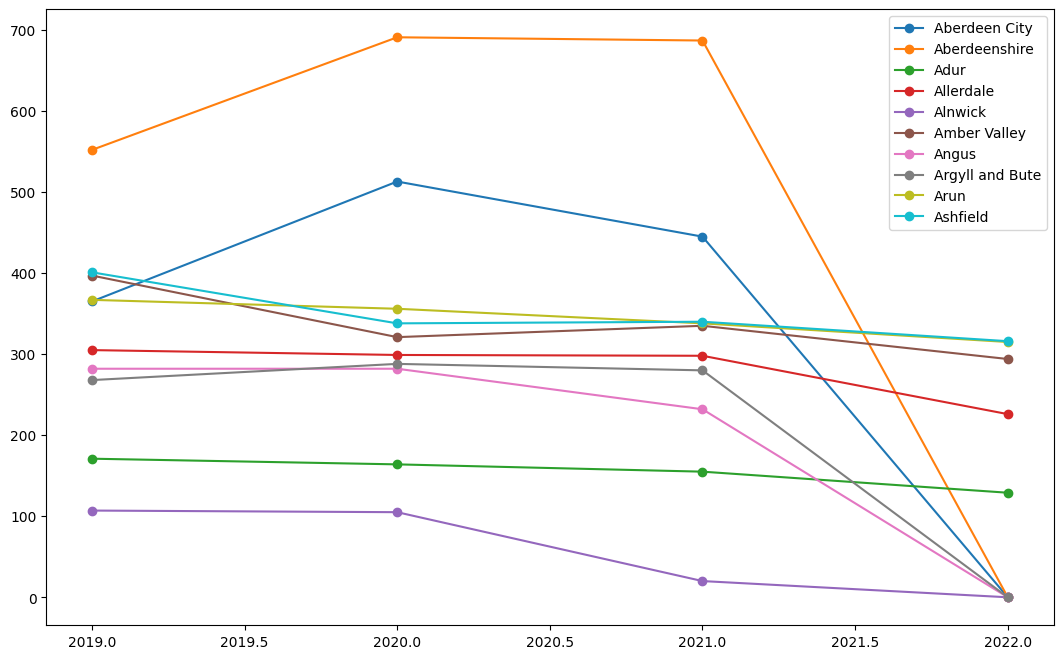

In [60]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label = x, marker = 'o')
    if count == 10:
        break

plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

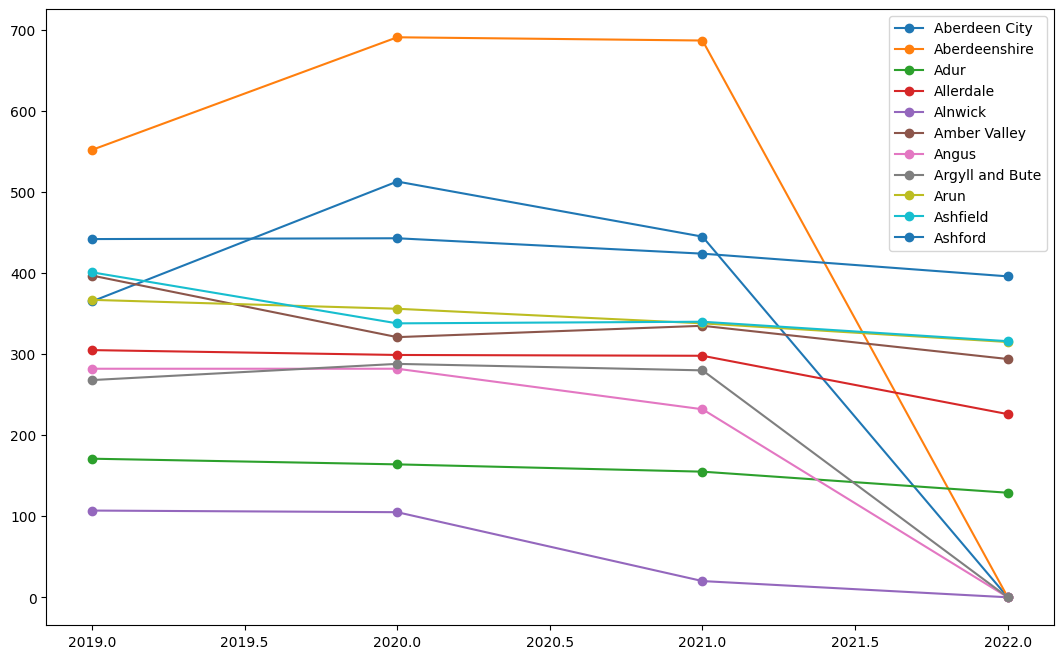

In [61]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label = x, marker = 'o')
    if count >= 11 and count <= 20:
        break

plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

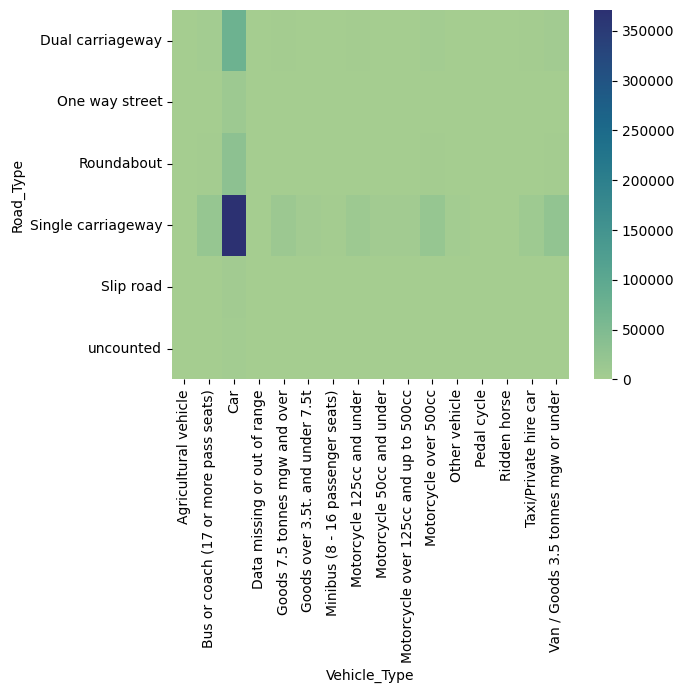

In [62]:
type_vh= accident.groupby(['Road_Type', 'Vehicle_Type']).size().unstack()


sns.heatmap(type_vh, cmap="crest")
plt.show()